#  Estados del Continuo del Hidrógeno

Darío Mitnik


## Práctica 2, Parte A

In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Estática
sp.init_printing()
%matplotlib inline

#Definimos los simbolos que vamos a usar.
r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)
k=sp.Symbol('k',positive=True)   # k en lugar de n 

In [11]:
# Función Radial Hidrogénica -- Estados del Continuo (con hipergeométricas)

def R_analytic(k,l,z,r):
    
    a = z/k # Parámetro de Sommerfeld
     
    # Generalización al campo complejo
    nj = 1j*a  
    rho = -2*1j*k*r
   
#    Los continuos se normalizan de otra forma
#    rnum = (2*z/nj)**3 * sp.gamma(nj+l+1)
#    rden = (sp.gamma(2*l+2))**2 * 2*nj * sp.gamma(nj-l)
#    rnorm = sp.sqrt(rnum/rden)

    rfunc = (1j)**l * (rho)**l * sp.exp(-rho/2) * sp.hyper((-nj+l+1,),(2*l+2,),(rho))
    R = rfunc
    return R

In [12]:
 # Definición de los vectores a plotear
    
nsize=500
xmax=10.0
xmin=0.
x = np.linspace(xmin,xmax,nsize)
psi = np.zeros(nsize,dtype=complex)


In [13]:
# Copiamos el array simbólico a numérico

# Variables de mi funcion
kq = 1
lq = 0
zq = 1

for i in range(nsize):
    psi[i]= R_analytic(kq,lq,zq,x[i]).evalf()
    
# Creo mi funcion de onda analytica
psi_analytic = R_analytic(kq,lq,zq,r)/sp.sqrt(4*sp.pi)

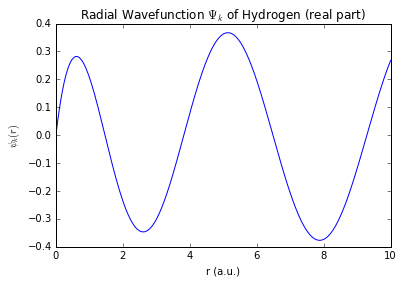

In [14]:
# Ploteo
plt.plot(x,x*psi.real);
plt.title("Radial Wavefunction $\Psi_{k}$ of Hydrogen (real part)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

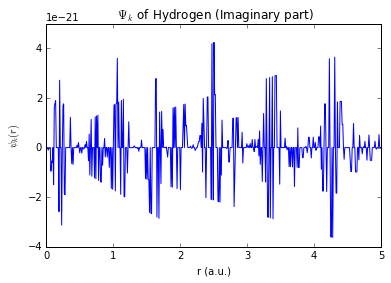

In [64]:
plt.plot(x,x*psi.imag);
plt.title(" $\Psi_{k}$ of Hydrogen (Imaginary part)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

## Chequeo ortonormalizacion de las funciones

In [69]:
# Normalizacion

sp.integrate((r*R_analytic(2.3,0,3,r))**2,(r,0,sp.oo)).evalf()

In [70]:
# Ortogonalidad

sp.integrate((r * R_analytic(2.3,0,3,r) * r * R_analytic(3.3,0,3,r)), (r,0,sp.oo)).evalf()

### No parecen estar normalizado ni son ortogonales

## Comportamiento en el origen

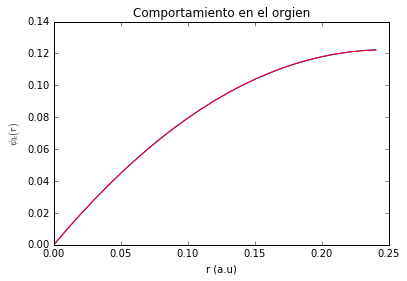

In [92]:
# Ajusto un polinomio cerca del origen

from numpy import polyfit, polyval
lim = int(nsize/20)
x_fit = x[0:lim]
poly_fit = polyfit(x_fit, x_fit*psi[0:lim],2)
psi_fit = polyval(poly_fit,x_fit)

# Ploteo la funcion y el ajuste en el rango elegido

plt.plot(x_fit, x_fit*psi[0:lim],'b')
plt.plot(x_fit, psi_fit,'r')
plt.title(r'Comportamiento en el orgien')
plt.xlabel('r (a.u)')
plt.ylabel('$\psi_{k}(r)$')

### Polinomio de grado 2 ajusta muy bien en toda la parte cerca del origen

## Condicion de Kato

In [122]:
kato1 = sp.diff(sp.re(psi_analytic),r).subs(r,0)
kato2 = sp.re(psi_analytic).subs(r,0)
kato1/kato2

    ⎛        ⎛ ┌─  ⎛2.0 - 0.666666666666667⋅ⅈ │  ⎞⎞         ⎛ ┌─  ⎛1.0 - 0.666
1.0⋅⎜- 2.0⋅re⎜ ├─  ⎜                          │ 0⎟⎟ - 3.0⋅im⎜ ├─  ⎜           
    ⎝        ⎝1╵ 1 ⎝            3             │  ⎠⎠         ⎝1╵ 1 ⎝           
──────────────────────────────────────────────────────────────────────────────
                                                       ⎛ ┌─  ⎛1.0 - 0.66666666
                                                     re⎜ ├─  ⎜                
                                                       ⎝1╵ 1 ⎝            2   

666666666667⋅ⅈ │  ⎞⎞         ⎛ ┌─  ⎛2.0 - 0.666666666666667⋅ⅈ │  ⎞⎞⎞
               │ 0⎟⎟ + 3.0⋅im⎜ ├─  ⎜                          │ 0⎟⎟⎟
 2             │  ⎠⎠         ⎝1╵ 1 ⎝            3             │  ⎠⎠⎠
────────────────────────────────────────────────────────────────────
6666667⋅ⅈ │  ⎞⎞                                                     
          │ 0⎟⎟                                                     
          │  ⎠⎠                 

## Grafico de tres funciones con energias parecidas

In [138]:
psi1 = np.zeros(nsize,dtype=complex)
psi2 = np.zeros(nsize,dtype=complex)
psi3 = np.zeros(nsize,dtype=complex)

for i in range(nsize):
    psi1[i]= R_analytic(3.5,0,2,x[i]).evalf()
    psi2[i]= R_analytic(4.0,0,2,x[i]).evalf()
    psi3[i]= R_analytic(4.5,0,2,x[i]).evalf()

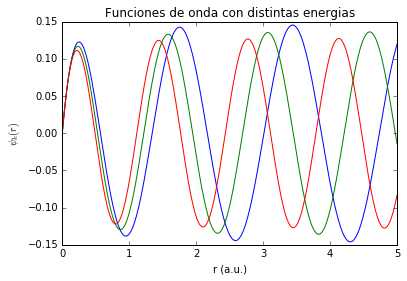

In [142]:
# Ploteo
plt.plot(x,x*psi1.real);
plt.plot(x,x*psi2.real);
plt.plot(x,x*psi3.real);
plt.title("Funciones de onda con distintas energias");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

#  Ejercicios
## Práctica 2, Parte B

* Elegir un ion hidrogénico y generar algunas funciones del continuo por diagonalización.
* Generar las funciones analíticas que corresponden a las energías que se obtuvieron diagonalizando.
* Dibujar las funciones y compararlas.


## Eligo un ion hidrogenico y genero funciones por diagonalizacion

In [42]:
from numpy import diag,  linspace, array ,arange
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show
from numpy import pi,sqrt,zeros,sin,cos

    
%matplotlib inline

import time
from __future__ import division

In [43]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [44]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
    return  U

In [55]:
from numpy import diag,  linspace, array, arange, zeros
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

step = 0.1
xmin = step
xmax = 20
x = arange(xmin,xmax,step)
nsize = len(x)
 
# array defined above
nsize = len(x)

x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])

# Kinetic (T) and Potential (V)
lq = 0 # Numero cuantico l
Z = 1 # Masa del nucleo
T = -0.5*Laplacian(x) + lq*(lq+1)/(2 * x * x) # Energia cinetica
V = -Z/x # Potencial culombiano

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

# Normalization
U=Normalizate(U,x)

('E=:', -0.49965619157262692)
('E=:', -0.12502383624019131)
('E=:', -0.050133676541073334)
('E=:', 0.015707627528810362)
('E=:', 0.11072430894039485)


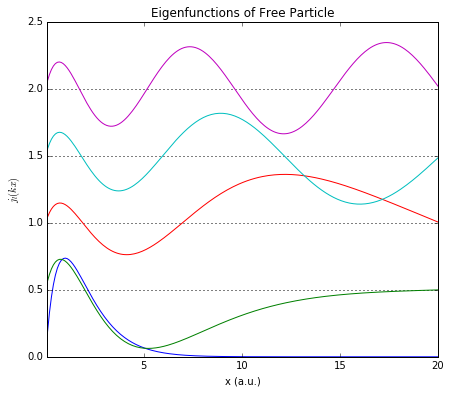

In [56]:
# Plot

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Number of functions to plot
nfunctions = 5

# Plot the potential
plot(x,V,color='k')

# Plot wavefunctions
ebase=-0.5
for i in range(nfunctions):
    ebase=ebase+0.5
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function 
    # so they don't all pile up on each other:
    plot(x,U[:,i]+ebase)
    print("E=:",E[i])
axis([xmin,xmax,0,2.5])
title("Eigenfunctions of Free Particle")
xlabel("x (a.u.)")
ylabel("$j_l(k x)$")
show()

# Partícula Libre

In [8]:
from numpy import zeros,linspace
import matplotlib.pyplot as plt

nsize=500
xmax=20.0
xmin=0.
x = linspace(xmin,xmax,nsize)
psi = zeros(nsize,dtype=complex)
jl2 =  zeros(nsize)
from __future__ import division

In [9]:
# Funciones de Bessel

import scipy.special as spl 
from numpy import pi,sqrt

def Bessel(k,l,r):
    rho = k*r
    if rho==0.0:
        jl = 0
        if l==0:
            jl=1
        return jl
    
    jl  =  sqrt( pi/(2*rho) ) * spl.jn(l+0.5,rho)
    return jl


In [10]:
# ComparaciÃ³n de la soluciÃ³n Coulombiana con Z=0 y Bessel

k = 2.05627032187
lq = 1

In [11]:
# Asymptotic Normalization

rinf = 10*(lq+1) / k  # kr = 10*l
psiinf = R_analytic(k,lq,0,rinf).evalf()
fjlinf = Bessel(k,lq,rinf)
fnorm = fjlinf/psiinf

In [12]:

for i in range(nsize):
    jl2[i] = Bessel(k,lq,x[i])
    psi[i]= R_analytic(k,lq,0,x[i]).evalf() * fnorm


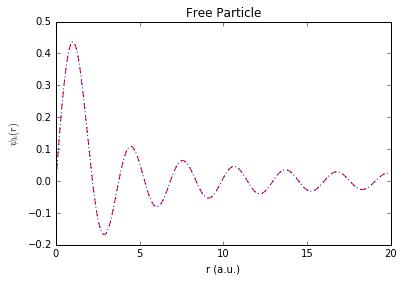

In [13]:
# Ploteo
plt.plot(x,psi.real,color='red',linestyle='dashed');
plt.plot(x,jl2,color='blue',linestyle='dotted')
plt.title("Free Particle");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");